In [123]:
%%capture
# pip install git+https://github.com/habla-liaa/totalpersistence.git

In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
1e-10 + 1e-18, 1.00000001e-10 

(1.00000001e-10, 1.00000001e-10)

lipschitz constant: 1.00
Distance matrix D: [[0.00000000e+00 1.00005410e+01 1.00004666e+01 1.41423708e+01
  2.00004811e+01 2.23611762e+01 0.00000000e+00 1.00005019e+01
  2.00008990e+01            inf 1.00000000e-10]
 [1.00005410e+01 0.00000000e+00 1.41427544e+01 1.00009750e+01
  2.23611084e+01 2.00006634e+01 0.00000000e+00 1.00005019e+01
  2.00008990e+01            inf 1.00000000e-10]
 [1.00004666e+01 1.41427544e+01 0.00000000e+00 1.00003650e+01
  1.00007452e+01 1.41424261e+01 1.00005019e+01 0.00000000e+00
  1.00005719e+01            inf 1.00000000e-10]
 [1.41423708e+01 1.00009750e+01 1.00003650e+01 0.00000000e+00
  1.41424319e+01 1.00001963e+01 1.00005019e+01 0.00000000e+00
  1.00005719e+01            inf 1.00000000e-10]
 [2.00004811e+01 2.23611084e+01 1.00007452e+01 1.41424319e+01
  0.00000000e+00 1.00009308e+01 2.00008990e+01 1.00005719e+01
  0.00000000e+00            inf 1.00000000e-10]
 [2.23611762e+01 2.00006634e+01 1.41424261e+01 1.00001963e+01
  1.00009308e+01 0.00000000e+00 2.

/home/miles/miniconda3/lib/python3.12/site-packages/persim/bottleneck.py:55: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(


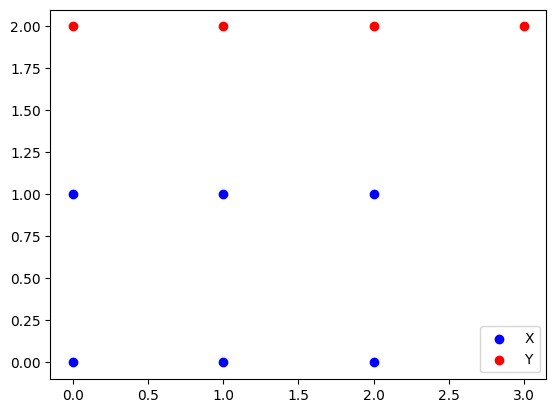

In [126]:
import numpy as np
from totalpersistence import totalpersistence, kercoker_via_cone
from totalpersistence.utils import general_position_distance_matrix, print_diagram
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]])
Y = np.array([[0, 2], [1, 2], [2, 2], [3, 2]])
f = np.array([0, 0, 1, 1, 2, 2])
f = np.array([0, 0, 1, 1, 2, 2])

plt.scatter(X[:, 0], X[:, 1], color='blue', label='X')
plt.scatter(Y[:, 0], Y[:, 1], color='red', label='Y')
plt.legend()

# son parte del algoritmo los parametros estos, 

cone_eps = 1e-10 
tol = 1e-3
perturbation = 1e-4

# Compute distance matrices
dX = general_position_distance_matrix(X, perturbation)*10
dY = general_position_distance_matrix(Y, perturbation)*10


# Calculate persistence diagrams
coker_dgm, ker_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(
    dX, dY, f, maxdim=2, cone_eps=cone_eps, tol=tol
)

print_diagram("X diagram:", dgmX)
print_diagram("Y diagram:", dgmY)

print_diagram("Cone Diagram:", cone_dgm)
print_diagram("Cokernel Diagram:", coker_dgm)
print_diagram("Kernel Diagram:", ker_dgm)

# Compute total persistence
results = totalpersistence(coker_dgm, ker_dgm)
coker_distances, ker_distances, coker_matchings, ker_matchings = results

# Print results
print("Cokernel distances:", coker_distances)
print("Kernel distances:", ker_distances)

In [127]:
import numpy as np
from totalpersistence import totalpersistence, kercoker_via_cone
from totalpersistence.utils import general_position_distance_matrix

# Generate sample point clouds
n_points = 10

np.random.seed(40)  # For reproducibility
X = np.random.rand(n_points, 2)  # Source space points
Y = 2*np.random.rand(n_points, 2)  # Target space points
f = np.arange(n_points)  # Function values

# Compute distance matrices
dX = general_position_distance_matrix(X)
dY = general_position_distance_matrix(Y)

# Calculate persistence diagrams
coker_dgm, ker_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(
    dX, dY, f, maxdim=2, cone_eps=0, tol=1e-10
)

print_diagram("Cone diagram:", cone_dgm)
print_diagram("Kernel Diagram:", ker_dgm)
print_diagram("Cokernel Diagram:", coker_dgm)

# Compute total persistence
results = totalpersistence(coker_dgm, ker_dgm)
coker_distances, ker_distances, coker_matchings, ker_matchings = results

# Print results
print("Cokernel distances:", coker_distances)
print("Kernel distances:", ker_distances)

lipschitz constant: 22.37
Distance matrix D: [[0.         0.44591575 0.25218139 0.58070975 0.73091061 0.791286
  0.76931031 0.93013387 0.07630236 0.45213653 0.         1.41976295
  1.32356095 1.19445715 0.83104327 0.94159985 0.36932374 0.67300441
  0.91402645 0.61400989 0.        ]
 [0.44591575 0.         0.3385919  0.42655833 0.39910982 0.36784297
  0.42210695 0.97967519 0.3781829  0.09706543 1.41976295 0.
  0.95587848 0.25733097 0.59180142 1.19202094 1.55162182 1.77048945
  1.55870591 1.5335535  0.        ]
 [0.25218139 0.3385919  0.         0.32881517 0.50272155 0.6080097
  0.54408335 0.73430197 0.18498822 0.39814797 1.32356095 0.95587848
  0.         0.76963336 0.92412845 0.48947892 1.63890193 1.26080816
  0.85752654 1.02104113 0.        ]
 [0.58070975 0.42655833 0.32881517 0.         0.25804175 0.4551207
  0.29982096 0.57229464 0.51064953 0.52262404 1.19445715 0.25733097
  0.76963336 0.         0.39328392 0.94557833 1.36331312 1.51449389
  1.30523226 1.27655993 0.        ]
 [0.730

In [128]:
for i in range(3):
    f = np.random.randint(n_points,size=n_points*2)
    print(f)

    # Calculate persistence diagrams
    coker_dgm, ker_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(
        dX, dY, f, maxdim=2
    )

    # Compute total persistence
    results = totalpersistence(coker_dgm, ker_dgm)
    coker_distances, ker_distances, coker_matchings, ker_matchings = results

    # Print results
    print("Cokernel distances:", coker_distances)
    print("Kernel distances:", ker_distances)

[4 4 1 9 6 5 1 8 7 7 6 4 7 1 6 9 4 4 6 1]
lipschitz constant: 35.74
Distance matrix D: [[0.         0.44591575 0.25218139 0.58070975 0.73091061 0.791286
  0.76931031 0.93013387 0.07630236 0.45213653        inf 0.59180142
         inf        inf 0.         0.88530287 0.9712122  1.26134203
  1.16742477 1.04897127 0.        ]
 [0.44591575 0.         0.3385919  0.42655833 0.39910982 0.36784297
  0.42210695 0.97967519 0.3781829  0.09706543        inf 0.59180142
         inf        inf 0.         0.88530287 0.9712122  1.26134203
  1.16742477 1.04897127 0.        ]
 [0.25218139 0.3385919  0.         0.32881517 0.50272155 0.6080097
  0.54408335 0.73430197 0.18498822 0.39814797        inf 0.
         inf        inf 0.59180142 1.19202094 1.55162182 1.77048945
  1.55870591 1.5335535  0.        ]
 [0.58070975 0.42655833 0.32881517 0.         0.25804175 0.4551207
  0.29982096 0.57229464 0.51064953 0.52262404        inf 1.5335535
         inf        inf 1.04897127 0.5350243  0.97763083 0.24953511
  

In [129]:
import numpy as np
from totalpersistence import totalpersistence, kercoker_via_cone
from totalpersistence.utils import general_position_distance_matrix

# Generate sample point clouds
n_points = 10
X = np.random.rand(n_points, 2)  # Source space points
Y = 2 * np.random.rand(n_points, 2)  # Target space points
f = np.arange(n_points)  # Function values

# Compute distance matrices
dX = general_position_distance_matrix(X)
dY = general_position_distance_matrix(Y)

# Calculate persistence diagrams
coker_dgm, ker_dgm, img_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(dX, dY, f, maxdim=2, compute_img=True)

TypeError: kercoker_via_cone() got an unexpected keyword argument 'compute_img'